In [1]:
#pip install tweepy

In [2]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re

In [3]:
#pip install matplotlib

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open((url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
dog_pred = pd.read_csv('image-predictions.tsv', sep='\t')

dog_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
API_key = '***'
API_key_secret = '***'
access_token = '***'
access_token_secret = '***'

In [8]:
import tweepy


auth = tweepy.OAuthHandler(API_key, API_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweet_ids = dog_pred.tweet_id.values
len(tweet_ids)


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

Success
261: 670783437142401025
Success
262: 670786190031921152
Success
263: 670789397210615808
Success
264: 670792680469889025
Success
265: 670797304698376195
Success
266: 670803562457407488
Success
267: 670804601705242624
Success
268: 670807719151067136
Success
269: 670811965569282048
Success
270: 670815497391357952
Success
271: 670822709593571328
Success
272: 670823764196741120
Success
273: 670826280409919488
Success
274: 670832455012716544
Success
275: 670833812859932673
Success
276: 670838202509447168
Success
277: 670840546554966016
Success
278: 670842764863651840
Success
279: 670995969505435648
Success
280: 671109016219725825
Success
281: 671115716440031232
Success
282: 671122204919246848
Success
283: 671134062904504320
Success
284: 671138694582165504
Success
285: 671141549288370177
Success
286: 671147085991960577
Success
287: 671151324042559489
Success
288: 671154572044468225
Success
289: 671159727754231808
Success
290: 671163268581498880
Success
291: 671166507850801152
Success


Success
518: 676440007570247681
Success
519: 676470639084101634
Success
520: 676496375194980353
Success
521: 676533798876651520
Success
522: 676575501977128964
Success
523: 676582956622721024
Success
524: 676588346097852417
Success
525: 676603393314578432
Success
526: 676606785097199616
Success
527: 676613908052996102
Success
528: 676617503762681856
Success
529: 676776431406465024
Success
530: 676811746707918848
Success
531: 676819651066732545
Success
532: 676821958043033607
Success
533: 676864501615042560
Success
534: 676897532954456065
Success
535: 676936541936185344
Success
536: 676942428000112642
Success
537: 676946864479084545
Success
538: 676948236477857792
Success
539: 676949632774234114
Success
540: 676957860086095872
Success
541: 676975532580409345
Success
542: 677187300187611136
Success
543: 677228873407442944
Success
544: 677269281705472000
Success
545: 677301033169788928
Success
546: 677314812125323265
Success
547: 677328882937298944
Success
548: 677331501395156992
Success


Success
775: 689623661272240129
Success
776: 689659372465688576
Success
777: 689661964914655233
Success
778: 689835978131935233
Success
779: 689877686181715968
Success
780: 689905486972461056
Success
781: 689977555533848577
Success
782: 689999384604450816
Success
783: 690005060500217858
Success
784: 690015576308211712
Success
785: 690021994562220032
Success
786: 690248561355657216
Success
787: 690360449368465409
Success
788: 690374419777196032
Success
789: 690400367696297985
Success
790: 690597161306841088
Success
791: 690649993829576704
Success
792: 690690673629138944
Success
793: 690728923253055490
Success
794: 690735892932222976
Success
795: 690932576555528194
Success
796: 690938899477221376
Success
797: 690959652130045952
Success
798: 691090071332753408
Success
799: 691096613310316544
Success
800: 691321916024623104
Success
801: 691416866452082688
Success
802: 691444869282295808
Success
803: 691459709405118465
Success
804: 691483041324204033
Success
805: 691675652215414786
Success


Rate limit reached. Sleeping for: 278


Success
902: 700002074055016451
Success
903: 700029284593901568
Success
904: 700062718104104960
Success
905: 700143752053182464
Success
906: 700151421916807169
Success
907: 700167517596164096
Success
908: 700462010979500032
Success
909: 700505138482569216
Success
910: 700518061187723268
Success
911: 700747788515020802
Success
912: 700796979434098688
Success
913: 700847567345688576
Success
914: 700864154249383937
Success
915: 700890391244103680
Success
916: 701214700881756160
Success
917: 701545186879471618
Success
918: 701570477911896070
Success
919: 701601587219795968
Success
920: 701889187134500865
Success
921: 701952816642965504
Success
922: 701981390485725185
Success
923: 702217446468493312
Success
924: 702276748847800320
Success
925: 702321140488925184
Success
926: 702539513671897089
Success
927: 702598099714314240
Success
928: 702671118226825216
Success
929: 702684942141153280
Success
930: 702932127499816960
Success
931: 703041949650034688
Success
932: 703079050210877440
Success


Success
1154: 732726085725589504
Success
1155: 732732193018155009
Success
1156: 733109485275860992
Success
1157: 733460102733135873
Success
1158: 733482008106668032
Success
1159: 733822306246479872
Success
1160: 733828123016450049
Success
1161: 734776360183431168
Success
1162: 734787690684657664
Success
1163: 734912297295085568
Success
1164: 735137028879360001
Success
1165: 735256018284875776
Success
1166: 735274964362878976
Success
1167: 735635087207878657
Success
1168: 735648611367784448
Success
1169: 735991953473572864
Success
1170: 736010884653420544
Success
1171: 736225175608430592
Success
1172: 736365877722001409
Success
1173: 736736130620620800
Success
1174: 737310737551491075
Success
1175: 737322739594330112
Success
1176: 737445876994609152
Success
1177: 737678689543020544
Success
1178: 737800304142471168
Success
1179: 737826014890496000
Success
1180: 738156290900254721
Success
1181: 738166403467907072
Success
1182: 738184450748633089
Success
1183: 738402415918125056
Success
11

Success
1403: 768970937022709760
Success
1404: 769212283578875904
Success
1405: 769695466921623552
Success
1406: 769940425801170949
Success
1407: 770069151037685760
Success
1408: 770093767776997377
Success
1409: 770293558247038976
Success
1410: 770414278348247044
Success
1411: 770655142660169732
Success
1412: 770772759874076672
Success
1413: 770787852854652928
Success
1414: 771004394259247104
Fail
1415: 771014301343748096
Success
1416: 771102124360998913
Success
1417: 771136648247640064
Success
1418: 771171053431250945
Success
1419: 771380798096281600
Success
1420: 771500966810099713
Success
1421: 771770456517009408
Success
1422: 772102971039580160
Success
1423: 772114945936949249
Success
1424: 772117678702071809
Success
1425: 772152991789019136
Success
1426: 772193107915964416
Success
1427: 772581559778025472
Success
1428: 772615324260794368
Success
1429: 772826264096874500
Success
1430: 772877495989305348
Success
1431: 773191612633579521
Success
1432: 773247561583001600
Success
1433:

Success
1652: 809448704142938112
Success
1653: 809808892968534016
Success
1654: 809920764300447744
Success
1655: 810254108431155201
Success
1656: 810284430598270976
Success
1657: 810657578271330305
Success
1658: 810896069567610880
Success
1659: 810984652412424192
Success
1660: 811386762094317568
Success
1661: 811627233043480576
Success
1662: 811744202451197953
Success
1663: 811985624773361665
Success
1664: 812372279581671427
Success
1665: 812466873996607488
Success
1666: 812503143955202048
Success
1667: 812709060537683968
Success
1668: 812781120811126785
Success
1669: 813051746834595840
Success
1670: 813066809284972545
Success
1671: 813081950185472002
Success
1672: 813096984823349248
Success
1673: 813112105746448384
Success
1674: 813127251579564032
Success
1675: 813142292504645637
Success
1676: 813157409116065792
Success
1677: 813172488309972993
Success
1678: 813187593374461952
Success
1679: 813202720496779264
Success
1680: 813217897535406080
Success
1681: 813800681631023104
Success
16

Rate limit reached. Sleeping for: 282


Success
1802: 831939777352105988
Success
1803: 832032802820481025
Success
1804: 832040443403784192
Success
1805: 832215726631055365
Success
1806: 832273440279240704
Success
1807: 832369877331693569
Success
1808: 832397543355072512
Success
1809: 832636094638288896
Success
1810: 832757312314028032
Success
1811: 832769181346996225
Success
1812: 832998151111966721
Success
1813: 833124694597443584
Success
1814: 833479644947025920
Success
1815: 833722901757046785
Success
1816: 833826103416520705
Success
1817: 833863086058651648
Success
1818: 834086379323871233
Success
1819: 834167344700198914
Success
1820: 834209720923721728
Success
1821: 834458053273591808
Success
1822: 834574053763584002
Success
1823: 834786237630337024
Success
1824: 834931633769889797
Success
1825: 835152434251116546
Success
1826: 835172783151792128
Success
1827: 835264098648616962
Success
1828: 835297930240217089
Success
1829: 835574547218894849
Success
1830: 836001077879255040
Success
1831: 836260088725786625
Success
18

Success
2052: 887473957103951883
Success
2053: 887517139158093824
Success
2054: 887705289381826560
Success
2055: 888078434458587136
Success
2056: 888202515573088257
Fail
2057: 888554962724278272
Success
2058: 888804989199671297
Success
2059: 888917238123831296
Success
2060: 889278841981685760
Success
2061: 889531135344209921
Success
2062: 889638837579907072
Success
2063: 889665388333682689
Success
2064: 889880896479866881
Success
2065: 890006608113172480
Success
2066: 890240255349198849
Success
2067: 890609185150312448
Success
2068: 890729181411237888
Success
2069: 890971913173991426
Success
2070: 891087950875897856
Success
2071: 891327558926688256
Success
2072: 891689557279858688
Success
2073: 891815181378084864
Success
2074: 892177421306343426
Success
2075: 892420643555336193
Success
1995.8494647
{680055455951884288: NotFound('404 Not Found\n144 - No status found with that ID.'), 754011816964026368: NotFound('404 Not Found\n144 - No status found with that ID.'), 759566828574212096: N

**The above scraping was unable to complete due to permission error. Twitter app was later suspended, so i couldn't create the necessary read and write permission**

Using the JSON-txt provided

In [10]:
url_txt = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response_json = requests.get(url_txt)

In [11]:
import os
foldername = 'tweet_json'
if not os.path.exists(foldername):
    os.makedirs(foldername)
    
with open(os.path.join(foldername, url_txt.split('/')[-1]), mode='wb') as file:
    file.write(response_json.content)

In [12]:
# reading the Json.txt file line by line into pandas DataFrame with tweet_id, retweet_count and favorite_count

df = []

for tweet_txt in os.listdir(foldername):
    with open(os.path.join(foldername, tweet_txt), 'r') as json_file:
        for line in json_file:
            tweet = json.loads(line)
            tweet_id = tweet['id']
            retweet_count = tweet['retweet_count']
            favorite_count = tweet['favorite_count']
            create_date = tweet['created_at']
            df.append({'retweet_count': retweet_count,
                      'favorite_count':favorite_count,
                      'create_date':create_date,
                      'tweet_id':tweet_id})
            
# storing in a dataframe
Tweet_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])
        

In [13]:
Tweet_data.head(5)

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


Reading in the twitter-archive-enhanced.csv data using pandas

In [14]:
Twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
Twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## Assessing the Data

### **Visual assessment**

In [15]:
dog_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
Tweet_data

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


In [17]:
Twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Assessing programmaitically

####  **Twitter_archive**

Checking the general info of the dataframe: datatypes, counts of each features, memory usage

In [18]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
Twitter_archive.isnull().sum() # counting number of missing values for each column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

checking for dog names

In [20]:
Twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [21]:
# counting for individual unique name
Twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Note that irrelevant names like by, the, a...... start with lowercase. Further assessing names that start with lowercase

In [22]:
list(Twitter_archive[Twitter_archive['name'].str.islower()].name.value_counts().index)

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space']

In [23]:
Twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
Twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
Twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
Twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Further investigating if dog has more than 1 stage

In [27]:
Twitter_archive.query('doggo == "doggo" & floofer!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [28]:
Twitter_archive.query('doggo == "doggo" & puppo!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [29]:
Twitter_archive.query('doggo == "doggo" & pupper!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [30]:
len(Twitter_archive.query('doggo == "doggo" & pupper!="None"')) # counting how many rows has both doggo and pupper

12

checking for duplicated text

In [31]:
sum(Twitter_archive['text'].duplicated())

0

In [32]:
#Twitter_archive['text'].sample(5)

checking for unique source of tweets

In [33]:
Twitter_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [34]:
Twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

assessing rating_numerator and rating_denominator

In [35]:
Twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [36]:
Twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

Checking minimum and maximum value of rating_numerator, rating_denominator

In [37]:
print('maximum numerator rating is {}'.format(Twitter_archive['rating_numerator'].max()))
print('minimum numerator rating is {}'.format(Twitter_archive['rating_numerator'].min()))

print('maximum denominator rating is {}'.format(Twitter_archive['rating_denominator'].max()))
print('minimum denominator rating is {}'.format(Twitter_archive['rating_denominator'].min()))

maximum numerator rating is 1776
minimum numerator rating is 0
maximum denominator rating is 170
minimum denominator rating is 0


assessing expanded_urls

In [38]:
len(Twitter_archive['expanded_urls'].unique())

2219

In [39]:
#checking for duplicated value
sum(Twitter_archive['expanded_urls'].duplicated()) 

137

#### **Tweet_data**

In [40]:
Tweet_data.head(4)

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017


In [41]:
Tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [42]:
Tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### dog_pred

In [43]:
dog_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [44]:
# checking the general informationof the data
dog_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Checking rows with all false dog prediction 

In [45]:
dog_pred.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


checking duplicated image url

In [46]:
sum(dog_pred['jpg_url'].duplicated())

66

In [47]:
#counting individual value in img_num
dog_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### QUALITY

**Twitter_archive**

--Timestamp and retweeted_status_timestamp datatype should be datatime

--[tweet_id, retweeted_status_id, retweeted_status_user_id] should be object and not float[avoid operation being perform]

--floofe, pupper,puppo,doggo has alot of missing value, indicated as None instead of NaN

--Name has irrelevant names like "a","not","all","by","the","my" etc

--there are more than 1 dog stage e.g doggo and pupper(12), doggo and floofer(1), doggo and puppo(1)

--Duplicated value in expanded_url

**Tweet_data**

--tweet_id, create_date has incorrect datatype

**dod_pred**

--duplicated values in jpg_url

#### TIDINESS

**Twitter_archive**

**Tweet_data**

--create_date exist in Twitter_archive as timestamp. therefore, create date should be drop

**dog_pred**

--Ensure that all rows contain at least one true prediction

## Cleaning Data

duplicate the three dataset

In [48]:
Twitter_archive_df= Twitter_archive.copy()
Tweet_data_df = Tweet_data.copy()
dog_pred_df = dog_pred.copy()

**Quality issue 1 --Timestamp and retweeted_status_timestamp datatype should be datatime**

Define:
changing the timestamp and retweeted_status_timestamp to datetime using .to_datetime function

code

In [49]:
Twitter_archive_df['timestamp'] = pd.to_datetime(Twitter_archive_df['timestamp'])
Twitter_archive_df['retweeted_status_timestamp'] = pd.to_datetime(Twitter_archive_df['retweeted_status_timestamp'])

test

In [50]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Quality issue 2 --[tweet_id, retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id] should be object and not float[avoid operation being perform]**


Define:
change the datatype to object using .astype(object)

code

In [51]:
Twitter_archive_df['tweet_id'] = Twitter_archive_df['tweet_id'].astype(object)
Twitter_archive_df['retweeted_status_id'] = Twitter_archive_df['retweeted_status_id'].astype(object)
Twitter_archive_df['retweeted_status_user_id'] = Twitter_archive_df['retweeted_status_user_id'].astype(object)
Twitter_archive_df['in_reply_to_status_id'] = Twitter_archive_df['in_reply_to_status_id'].astype(object)
Twitter_archive_df['in_reply_to_user_id'] = Twitter_archive_df['in_reply_to_user_id'].astype(object)

Test

In [52]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Quality issue 4 --Name has irrelevant names like "a","not","all","by","the","my" etc**

**Define:**
Notice that all irrelevant names starts with lowercase.

All lowercase name will be change to "None" then replace with NaN


code

In [53]:
Twitter_archive_df.shape

(2356, 17)

In [54]:
Twitter_archive_df[[Twitter_archive_df['name'].str.match('[a-z]+')]] = 'None' #changing all lowercase name to None

In [55]:
Twitter_archive_df['name'].value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

In [56]:
Twitter_archive_df['name'].replace('None', np.NAN, inplace=True) # Replace None with NaN

Test

In [57]:
Twitter_archive_df['name'].isnull().sum()

854

In [58]:
Twitter_archive_df.query('name=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Quality issue 5 --there are more than 1 dog stage e.g doggo and pupper(12), doggo and floofer(1), doggo and puppo(1)**

**Define:**
As stated in dogtionary, doggo, pupper, puppo, and floofer are all dog stages.

floofer is not completely a stage but it is a terms used to denote dog with excessive furs

**Note:** It's not possible for a dog to exhibit two stages at the same time


# &

**Quality issue 3 --floofer, pupper,puppo,doggo has alot of missing value, indicated as None instead of NaN**

**Define:**
Replacing all None value with NaN which is a standard form of null values. This will be done using .replace()

code

In [59]:
#it is possible for a dog stage to be doggo and has excessive furs
Twitter_archive_df.query('doggo == "doggo" & floofer=="floofer"') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,None,None


In [60]:
#Twitter_archive_df.query('doggo == "doggo" & pupper.notna()')
Twitter_archive_df.query('doggo == "doggo" & pupper=="pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,None,pupper,None
565,802265048156610565,733109485275860992.0,4196983835.0,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaT,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",733109485275860992.0,4196983835.0,2016-05-19 01:38:16+00:00,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,None,pupper,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,None,pupper,None


In [61]:
Twitter_archive_df.query('doggo == "doggo" & puppo=="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,None,None,puppo


A big pupper is doggo while a small doggo is a pupper. Both terms are mostly used interchangeably

Therefore setting None for pupper column with record  doggo and pupper [pupper coulmn]

For the record with both puppo and doggo, the text[Here's a puppo participating in the #ScienceMa...] clearly stated puppo. Therefor setting doggo to None

In [62]:
# set pupper column as None for records which have both doggo and pupper
Twitter_archive_df['pupper'][(Twitter_archive_df.doggo == 'doggo') & (Twitter_archive_df.pupper == 'pupper')] = 'None'    

In [63]:
#Setting doggo to None
Twitter_archive_df['doggo'][(Twitter_archive_df.doggo == 'doggo') & (Twitter_archive_df.puppo == 'puppo')] = 'None'  

In [64]:
#Setting floofer to NaN
Twitter_archive_df['floofer'][(Twitter_archive_df.doggo == 'doggo') & (Twitter_archive_df.floofer == 'floofer')] = 'None'   

Test

In [65]:
Twitter_archive_df.query('doggo == "doggo" & pupper=="pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [66]:
Twitter_archive_df.query('doggo == "doggo" & floofer=="floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [67]:
Twitter_archive_df.query('doggo == "doggo" & puppo=="puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Quality issue 3


In [68]:
Twitter_archive_df['floofer'].replace('None', np.NAN, inplace=True)
Twitter_archive_df['pupper'].replace('None', np.NAN, inplace=True)
Twitter_archive_df['puppo'].replace('None', np.NAN, inplace=True)
Twitter_archive_df['doggo'].replace('None', np.NAN, inplace=True)

Test

In [69]:
print(Twitter_archive_df['floofer'].value_counts())
print(Twitter_archive_df['pupper'].value_counts())
print(Twitter_archive_df['puppo'].value_counts())
print(Twitter_archive_df['doggo'].value_counts())

floofer    9
Name: floofer, dtype: int64
pupper    233
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64
doggo    92
Name: doggo, dtype: int64


**Quality issue 6 --Duplicated values in expanded_urls**

**Define:** dropping duplicated values using .drop_duplicates()

code

In [70]:
Twitter_archive_df.drop_duplicates('expanded_urls', inplace=True)

**Test**

In [71]:
sum(Twitter_archive_df['expanded_urls'].duplicated())

0

**Quality issue 7 --tweet_id, create_date has incorrect datatype**  [Tweet_data_df]

**Define:**
changing the datatype using .astype

code

In [72]:
Tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [73]:
Tweet_data_df['tweet_id'] = Tweet_data_df['tweet_id'].astype(object)
Tweet_data_df['create_date'] = pd.to_datetime(Tweet_data_df['create_date'])

Test

In [74]:
Tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   object             
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   create_date     2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 73.7+ KB


**Quality issue 8 --Duplicated values in jpg_url**  [dog_pred]

**Define:**
dropping duplicated values using .drop_duplicates()

code

In [75]:
dog_pred.drop_duplicates('jpg_url', inplace=True)

Test

In [76]:
sum(dog_pred['jpg_url'].duplicated())

0

**Tidiness issue 1 --[Doggo, puppo, pupper,floofer] should be in one column as "stages"**

**Define:**
Using .melt() function to solve the tidiness issue

code

In [77]:
Twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [78]:
#using .melt() function
Twitter_archive_df = pd.melt(Twitter_archive_df, id_vars=['tweet_id','in_reply_to_status_id',
                                                         'in_reply_to_user_id','timestamp','source','text','retweeted_status_id',
                                                        'retweeted_status_user_id','retweeted_status_timestamp',
                                                        'expanded_urls','rating_numerator','rating_denominator','name'],
                            value_vars=['doggo','floofer','pupper','puppo'], 
                            var_name='count_stages', value_name='dog_stages')


In [79]:
Twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,count_stages,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,NaN


In [80]:
# checking the shape after performing melting
Twitter_archive_df.shape

(8456, 15)

In [81]:
Twitter_archive_df['dog_stages'].unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

Note: after performing melt function, each tweet_id has been duplicated 3ce the original

In [82]:
sum(Twitter_archive_df['tweet_id'].duplicated())

6342

Sorting dog_stages to remove relative duplicate tweet_ids

In [83]:
Twitter_archive_df = Twitter_archive_df.sort_values('dog_stages').drop_duplicates('tweet_id', keep='first')

Test

In [84]:
sum(Twitter_archive_df['tweet_id'].duplicated())

0

In [85]:
Twitter_archive_df['dog_stages'].value_counts()

pupper     220
doggo       85
puppo       26
floofer      9
Name: dog_stages, dtype: int64

dropping count_stages column

In [86]:
Twitter_archive_df.drop('count_stages', axis=1, inplace=True)

**Tidiness issue 2 --source having unnecessary html tags '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'**

**Define:**
extracting source in-between html tags

Randomly displaying source content

code

In [87]:
Twitter_archive['source'].sample(4)

2342    <a href="http://twitter.com/download/iphone" r...
735     <a href="http://twitter.com/download/iphone" r...
1863    <a href="http://twitter.com/download/iphone" r...
1272    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [88]:
Twitter_archive_df['source'] = Twitter_archive_df['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_15200\1119520696.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Twitter_archive_df['source'] = Twitter_archive_df['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


Test

In [89]:
Twitter_archive_df['source'].value_counts()

Twitter for iPhone     1989
Vine - Make a Scene      87
Twitter Web Client       28
TweetDeck                 9
None                      1
Name: source, dtype: int64

In [90]:
Twitter_archive_df['source'].replace('None', np.NAN, inplace=True)

In [91]:
# Changing the dtype to categorical

Twitter_archive_df['source'] = Twitter_archive_df['source'].astype('category')

Test

In [92]:
Twitter_archive_df['source'].value_counts()

Twitter for iPhone     1989
Vine - Make a Scene      87
Twitter Web Client       28
TweetDeck                 9
Name: source, dtype: int64

**Tidiness issue 3 --in_reply_to_status_id and in_reply_to_user_id are not original data** 

**Define:**
Drop all rows that has in_reply_to_status_id and in_reply_to_user_id value and drop the columns as well. They are not original data.

code

In [93]:
#checking affected rows
Twitter_archive_df.query('in_reply_to_status_id.notna()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
504,802265048156610565,733109485275860992.0,4196983835.0,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo
5547,694356675654983680,670668383499735040.0,4196983835.0,2016-02-02 03:08:26+00:00,Twitter for iPhone,This pupper only appears through the hole of a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/694356675...,10,10,NaN,pupper
5429,705786532653883392,703255935813287936.0,4196983835.0,2016-03-04 16:06:36+00:00,Twitter for iPhone,"Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/705786532...,11,10,NaN,pupper
22,None,None,None,None,NaN,None,None,None,None,None,None,None,NaN,NaN
30,886267009285017600,886266357075128320.0,2281181600.0,2017-07-15 16:51:35+00:00,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12,10,NaN,NaN
137,863079547188785154,667152164079423488.0,4196983835.0,2017-05-12 17:12:53+00:00,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/863079547...,14,10,NaN,NaN
168,856526610513747968,855818117272018944.0,4196983835.0,2017-04-24 15:13:52+00:00,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/856526610...,14,10,NaN,NaN
227,844979544864018432,759099523532779520.0,4196983835.0,2017-03-23 18:29:57+00:00,Twitter for iPhone,PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/844979544...,13,10,NaN,NaN
910,746906459439529985,746885919387574272.0,4196983835.0,2016-06-26 03:22:31+00:00,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/746906459...,0,10,NaN,NaN
911,746818907684614144,691416866452082688.0,4196983835.0,2016-06-25 21:34:37+00:00,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/746818907...,13,10,NaN,NaN


In [94]:
# checking affected rows
Twitter_archive_df.query('in_reply_to_user_id.notna()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
504,802265048156610565,733109485275860992.0,4196983835.0,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo
5547,694356675654983680,670668383499735040.0,4196983835.0,2016-02-02 03:08:26+00:00,Twitter for iPhone,This pupper only appears through the hole of a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/694356675...,10,10,NaN,pupper
5429,705786532653883392,703255935813287936.0,4196983835.0,2016-03-04 16:06:36+00:00,Twitter for iPhone,"Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/705786532...,11,10,NaN,pupper
22,None,None,None,None,NaN,None,None,None,None,None,None,None,NaN,NaN
30,886267009285017600,886266357075128320.0,2281181600.0,2017-07-15 16:51:35+00:00,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12,10,NaN,NaN
137,863079547188785154,667152164079423488.0,4196983835.0,2017-05-12 17:12:53+00:00,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/863079547...,14,10,NaN,NaN
168,856526610513747968,855818117272018944.0,4196983835.0,2017-04-24 15:13:52+00:00,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/856526610...,14,10,NaN,NaN
227,844979544864018432,759099523532779520.0,4196983835.0,2017-03-23 18:29:57+00:00,Twitter for iPhone,PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/844979544...,13,10,NaN,NaN
910,746906459439529985,746885919387574272.0,4196983835.0,2016-06-26 03:22:31+00:00,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/746906459...,0,10,NaN,NaN
911,746818907684614144,691416866452082688.0,4196983835.0,2016-06-25 21:34:37+00:00,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/746818907...,13,10,NaN,NaN


same tweet_id were affected for in_reply_to_status_id and in_reply_to_user_id value, so dropping the rows and the columns itself

In [95]:
Twitter_archive_df = Twitter_archive_df[Twitter_archive_df.in_reply_to_status_id.isnull()]

In [96]:
# dropping the columns
Twitter_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

Test

In [98]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 9 to 2113
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2089 non-null   object  
 1   timestamp                   2089 non-null   object  
 2   source                      2089 non-null   category
 3   text                        2089 non-null   object  
 4   retweeted_status_id         175 non-null    object  
 5   retweeted_status_user_id    175 non-null    object  
 6   retweeted_status_timestamp  175 non-null    object  
 7   expanded_urls               2089 non-null   object  
 8   rating_numerator            2089 non-null   object  
 9   rating_denominator          2089 non-null   object  
 10  name                        1443 non-null   object  
 11  dog_stages                  337 non-null    object  
dtypes: category(1), object(11)
memory usage: 198.1+ KB


**Tidiness issue 4 --Only the original tweet is needed, drop all retweet columnsi.e retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

**Define:**
Delete rows with retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp by filtering the dataframe using .isnull(). Since same tweet_ids are affected, filtering using any of the column will cater for all

code

In [99]:
# Filtering the dataframe

Twitter_archive_df = Twitter_archive_df[Twitter_archive_df.retweeted_status_id.isnull()]

In [100]:
# dropping the columns
Twitter_archive_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15200\1673881077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter_archive_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


Test

In [102]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 9 to 2113
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1914 non-null   object  
 1   timestamp           1914 non-null   object  
 2   source              1914 non-null   category
 3   text                1914 non-null   object  
 4   expanded_urls       1914 non-null   object  
 5   rating_numerator    1914 non-null   object  
 6   rating_denominator  1914 non-null   object  
 7   name                1332 non-null   object  
 8   dog_stages          303 non-null    object  
dtypes: category(1), object(8)
memory usage: 136.6+ KB


In [103]:
Twitter_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

**Tidiness issue 5 --create_date exist in Twitter_archive as timestamp. therefore, create date should be drop**

**Define:**
Dropping of create_date in Tweet_data using .drop()

code

In [105]:
Tweet_data_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'create_date'], dtype='object')

In [106]:
Tweet_data_df.drop('create_date', axis=1, inplace=True)

Test

In [107]:
Tweet_data_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

**Tidiness issue 6 --Ensure that all rows contain at least one true prediction**

**Define:**
Using .query() method to filter rows with all false-prediction

code

In [108]:
dog_pred_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [109]:
#dog_pred['p1'].unique()
dog_pred_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [110]:
dog_pred_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [111]:
dog_pred_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [112]:
# checking rows with at least one true prediction
dog_pred_df.query('(p1_dog == True) or (p2_dog == True) or (p3_dog == True)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [113]:
dog_pred_df.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [114]:
# filtering rows with at least one dog prediction
dog_pred_df = dog_pred_df.query('(p1_dog == True) or (p2_dog == True) or (p3_dog == True)')

Test

In [115]:
dog_pred_df.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Confirming the three dataframe are in right order

In [116]:
Twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 9 to 2113
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1914 non-null   object             
 1   timestamp           1914 non-null   datetime64[ns, UTC]
 2   source              1914 non-null   category           
 3   text                1914 non-null   object             
 4   expanded_urls       1914 non-null   object             
 5   rating_numerator    1914 non-null   int32              
 6   rating_denominator  1914 non-null   int32              
 7   name                1332 non-null   object             
 8   dog_stages          303 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int32(2), object(5)
memory usage: 121.7+ KB


In [117]:
Tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [118]:
dog_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### **Merging the three dataframe together using .merge() function. Using inner and on tweet_id**

In [119]:
Clean_df = pd.merge(pd.merge(Twitter_archive_df,Tweet_data_df, on='tweet_id', how='inner'),dog_pred_df, on='tweet_id', how='inner')

In [120]:
Clean_df.shape

(1520, 22)

saving to csv file

In [121]:
Clean_df.to_csv('twitter_archive_master.csv', index=False)

### **Analysing the twitter_archive_master dataset to get insights and visualization** 

**Questions to be analyze:**

--Which device is used to tweet the most?

--Top tweet IDs with the most average likes

--When and in what month did the most tweets occur?

--What are the most common dog names

In [122]:
# reading the data using pd.read_csv
df = pd.read_csv('twitter_archive_master.csv')

Inspecting the top 3

In [123]:
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,760893934457552897,2016-08-03 17:43:45+00:00,Twitter for iPhone,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,doggo,1104,...,1,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True
2,775364825476165632,2016-09-12 16:05:54+00:00,Twitter for iPhone,This is Finley. He's an independent doggo stil...,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,3472,...,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1520 non-null   int64  
 1   timestamp           1520 non-null   object 
 2   source              1520 non-null   object 
 3   text                1520 non-null   object 
 4   expanded_urls       1520 non-null   object 
 5   rating_numerator    1520 non-null   int64  
 6   rating_denominator  1520 non-null   int64  
 7   name                1135 non-null   object 
 8   dog_stages          233 non-null    object 
 9   retweet_count       1520 non-null   int64  
 10  favorite_count      1520 non-null   int64  
 11  jpg_url             1520 non-null   object 
 12  img_num             1520 non-null   int64  
 13  p1                  1520 non-null   object 
 14  p1_conf             1520 non-null   float64
 15  p1_dog              1520 non-null   bool   
 16  p2    

Changing the dtypes of tweet_id and img_num

In [125]:
df['tweet_id'] = df['tweet_id'].astype('object')
df['img_num'] = df['img_num'].astype('category')

checking missing values

In [126]:
df.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                   385
dog_stages            1287
retweet_count            0
favorite_count           0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
dtype: int64

checking for numerical distribution of the data

In [127]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,11.385526,10.492105,2674.194737,8949.605263,0.604381,0.136855,0.061874
std,7.538275,6.558689,4569.875289,12186.197498,0.267961,0.100927,0.052490
min,0.000000,7.000000,16.000000,81.000000,0.044333,0.000010,0.000001
25%,10.000000,10.000000,651.500000,2212.000000,0.374963,0.054704,0.016055
50%,11.000000,10.000000,1402.500000,4226.000000,0.606253,0.121376,0.049527
75%,12.000000,10.000000,3129.250000,11315.500000,0.853978,0.198024,0.095050
max,165.000000,150.000000,79515.000000,132810.000000,0.999984,0.464816,0.273419


In [128]:
# changing timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### **Which device is used to tweet the most?**

In [129]:
df['source'].value_counts()

Twitter for iPhone    1493
Twitter Web Client      19
TweetDeck                8
Name: source, dtype: int64

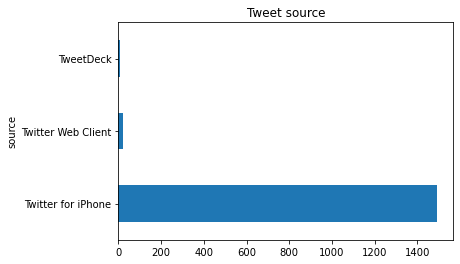

In [130]:
df['source'].value_counts().plot(kind='barh', title='Tweet source', xlabel='source', ylabel='frequency');

Around 98% users tweet by iPhone

#### **Top tweet IDs with the most average likes**

In [131]:
df.groupby('tweet_id')['retweet_count','favorite_count'].mean().nlargest(3, 'favorite_count')

C:\Users\USER\AppData\Local\Temp\ipykernel_15200\1086355708.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('tweet_id')['retweet_count','favorite_count'].mean().nlargest(3, 'favorite_count')


,retweet_count,favorite_count
tweet_id,,
822872901745569793,48265.0,132810.0
744234799360020481,79515.0,131075.0
879415818425184262,45849.0,107956.0


Checking for the attributes that makes it favorites

In [132]:
df.query('tweet_id==822872901745569793')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
223,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,48265,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


#### **When and in what month did the most tweets occur?**

In [133]:
df.tweet_id.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()

timestamp  timestamp
2015       11           194
           12           258
2016       1            133
           2             84
           3            102
           4             47
           5             45
           6             55
           7             73
           8             42
           9             52
           10            55
           11            44
           12            48
2017       1             52
           2             54
           3             37
           4             32
           5             29
           6             38
           7             45
           8              1
Name: tweet_id, dtype: int64

December, 2015 have the highest tweets

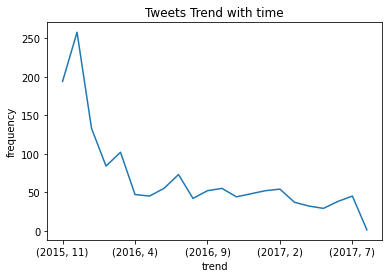

In [134]:
df.tweet_id.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count().plot(kind='line', 
                                                                                      title='Tweets Trend with time',xlabel='trend',
                                                                                     ylabel='frequency');

The above visualization shows that Tweets trend decrease with time with highest(peak) tweets in December, 2015

#### **What are the most common dog names**

In [135]:
df.name.value_counts().nlargest(5)

Lucy       10
Tucker      9
Charlie     9
Cooper      9
Oliver      8
Name: name, dtype: int64

<AxesSubplot:title={'center':'Common Dog Names'}, xlabel='Dog names', ylabel='Frequency'>

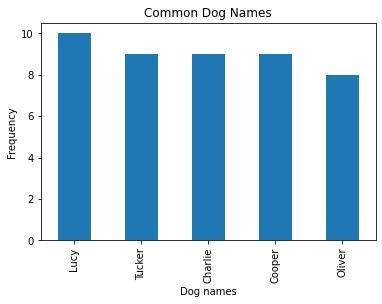

In [136]:
df.name.value_counts().nlargest(5).plot(kind='bar', title='Common Dog Names', xlabel='Dog names', ylabel='Frequency') 

Tucker, Charlie, and Copper have the same occurence while Lucy occur most

**Visualizing ratings distribution**

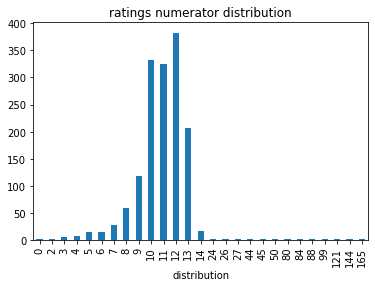

In [137]:
df['rating_numerator'].value_counts().sort_index().plot(kind='bar', title='ratings numerator distribution', xlabel='distribution');

The above plot shows the distribution of dog ratings with minimum to be 0 and mostly concentrated between 10-13. The ratings numerator is not evenly distributed

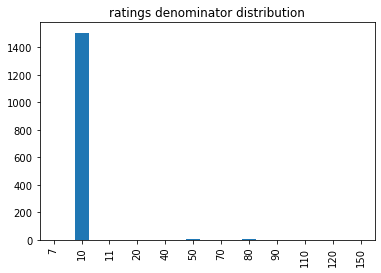

In [138]:
df['rating_denominator'].value_counts().sort_index().plot(kind='bar', title='ratings denominator distribution');

The above plot shows the distribution of dog ratings denominator with minimum to be 7 and mostly concentrated between 9-10. The ratings denominator is not evenly distributed